In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import seaborn as sns
import cartopy.feature as cfeature
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from utils.data import load_tc_data

In [2]:
X_train = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/train_X.npy')
X_miroc = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-hist.npy')

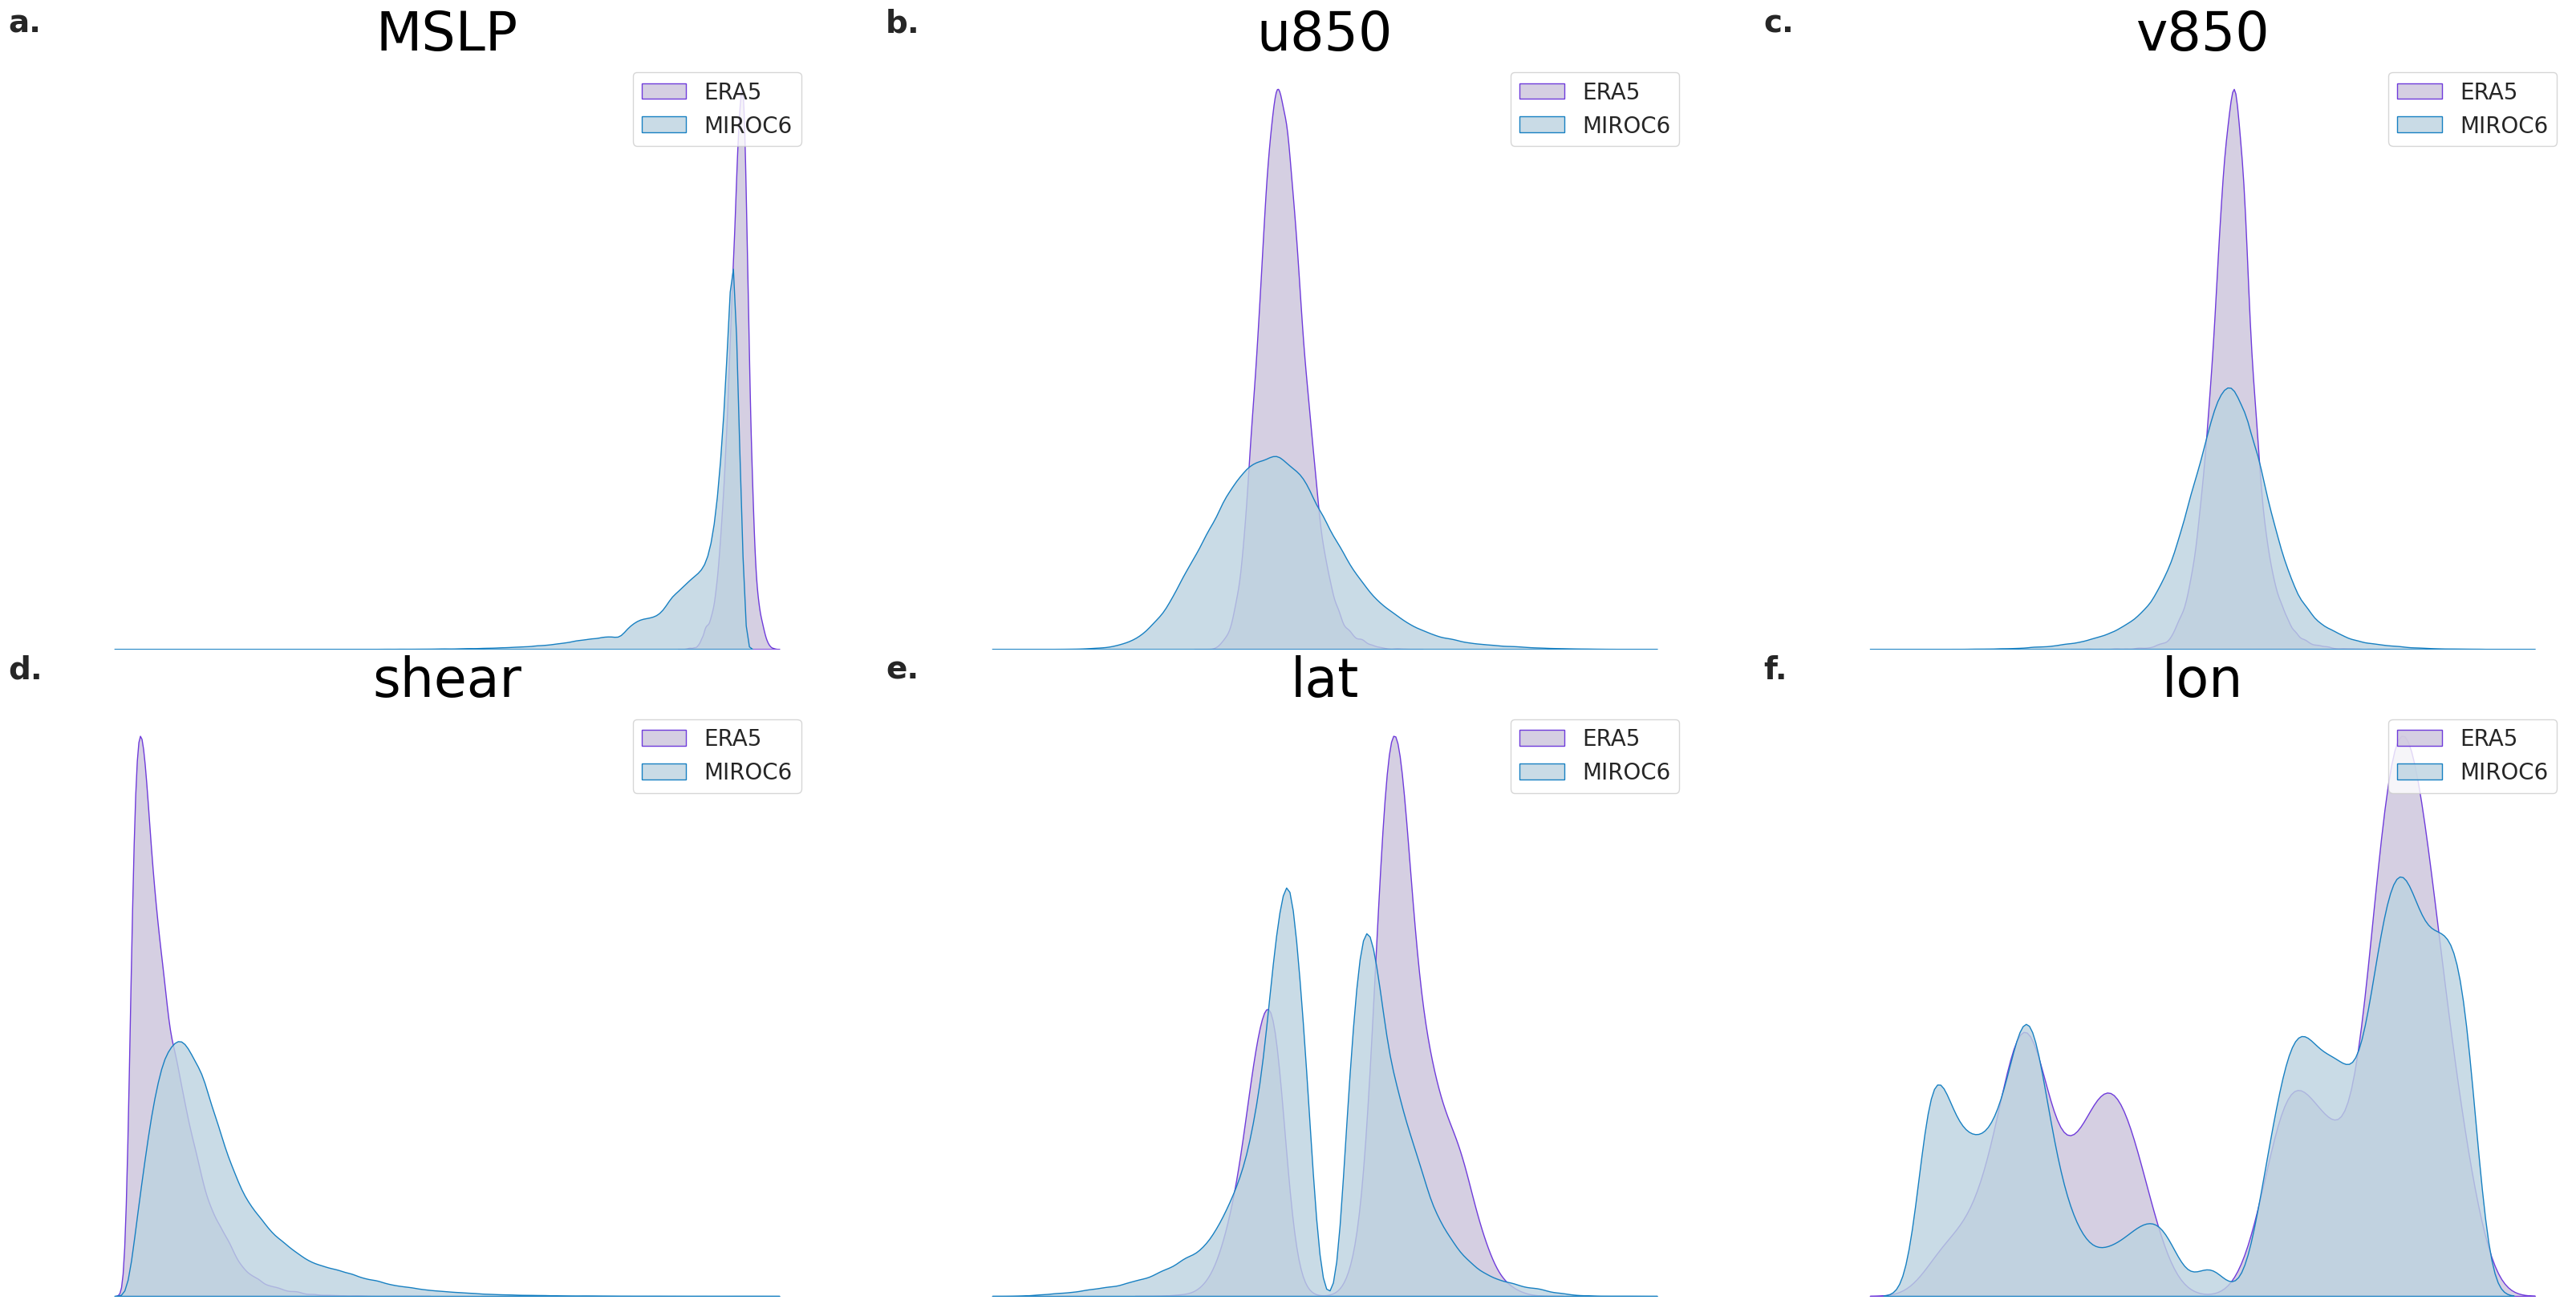

In [3]:

sns.set_context("notebook")
fig, axes = plt.subplots(2,3, figsize=(40, 20))
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
sns.set_style("ticks")
sns.set_style("white")

alpha=0.8
# first kde plot

sns.kdeplot(X_train[:,0].flatten(),fill=True,color='#cbc3db',ax=axes[0,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,0].flatten(),fill=True,color='#bcd3e0',ax=axes[0,0],alpha=alpha,edgecolor='#1780c2')
# # sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,0],alpha=alpha,edgecolor='#3b991c')
axes[0,0].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,0].set_title('MSLP',fontsize=48)
axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=28, weight='bold')

# second kde plot
sns.kdeplot(X_train[:,1].flatten(),fill=True,color='#cbc3db',ax=axes[0,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,1].flatten(),fill=True,color='#bcd3e0',ax=axes[0,1],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,1],alpha=alpha,edgecolor='#3b991c')
axes[0,1].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,1].set_title('u850',fontsize=48)
axes[0,1].text(-0.1, 1.05, 'b.', transform=axes[0,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,2],fill=True,color='#cbc3db',ax=axes[0,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,2],fill=True,color='#bcd3e0',ax=axes[0,2],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[0,2].legend(['ERA5','MIROC6'],fontsize=20)
axes[0,2].set_title('v850',fontsize=48)
axes[0,2].text(-0.1, 1.05, 'c.', transform=axes[0,2].transAxes, size=28, weight='bold')

# fourth kde plot
sns.kdeplot(X_train[:,3],fill=True,color='#cbc3db',ax=axes[1,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,3],fill=True,color='#bcd3e0',ax=axes[1,0],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,0].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,0].set_title('shear',fontsize=48)
axes[1,0].text(-0.1, 1.05, 'd.', transform=axes[1,0].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,4],fill=True,color='#cbc3db',ax=axes[1,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,4],fill=True,color='#bcd3e0',ax=axes[1,1],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,1].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,1].set_title('lat',fontsize=48)
axes[1,1].text(-0.1, 1.05, 'e.', transform=axes[1,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,5],fill=True,color='#cbc3db',ax=axes[1,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,5],fill=True,color='#bcd3e0',ax=axes[1,2],alpha=alpha,edgecolor='#1780c2')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,2].legend(['ERA5','MIROC6'],fontsize=20)
axes[1,2].set_title('lon',fontsize=48)
axes[1,2].text(-0.1, 1.05, 'f.', transform=axes[1,2].transAxes, size=28, weight='bold')

plt.subplots_adjust(hspace=0.1)
plt.savefig('miroc_vs_era5_2.png',bbox_inches='tight',transparent=False)

In [4]:
# subselect using propoensity score matching
# https://mathematica.stackexchange.com/questions/171848/selecting-a-random-subset-to-match-pdf-of-another-or-a-given-distribution 
# https://towardsdatascience.com/psmpy-propensity-score-matching-in-python-a3e0cd4d2631

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Define your original cohort distribution
non_cohort = pd.DataFrame({'latitude' :  X_miroc[:,4][:45623], 'longitude' :  X_miroc[:,5][:45623], 'target': np.zeros(X_miroc[:,4].shape)[:45623]})  # Replace with your actual data
# non_cohort = pd.DataFrame({'latitude' :  X_miroc[:,4][:45623], 'target': np.zeros(X_miroc[:,4].shape)[:45623]})

# Define your target distribution
cohort = pd.DataFrame({'latitude' :  X_train[:,4], 'longitude' :  X_train[:,5], 'target': np.ones(X_train[:,4].shape)})  # Replace with your actual data
# cohort = pd.DataFrame({'latitude' :  X_train[:,4], 'target': np.ones(X_train[:,4].shape)})

# construct training dataset
df = pd.concat([cohort, non_cohort])
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# fit logistic regression model this provides a propensity score for each value in the miroc dataset
model = LogisticRegression().fit(preprocessing.normalize(X), y)
# model = SVR(kernel="linear", C=1, gamma=0.1, epsilon=0.1).fit(preprocessing.normalize(X), y)
# model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=0,loss='squared_error').fit(preprocessing.normalize(X), y)
# predictions = model.predict_proba(preprocessing.normalize(non_cohort.iloc[:, :-1]))[:,1]
predictions = model.predict_log_proba(preprocessing.normalize(non_cohort.iloc[:, :-1]))[:,1]
print(predictions.shape)
print(predictions)
print(np.sum(predictions))
preds = np.zeros((cohort.shape))
preds[:, :-1] = non_cohort.iloc[:, :-1]
preds[:, -1] = predictions

# Use nearest neightbour to find closest values
# miroc propensity scores that are closest in distance to the training lables of 1 are chosen to be subsampled
# nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(cohort.iloc[:, :-1])
nbrs = NearestNeighbors(n_neighbors=1, radius=0.001, algorithm='ball_tree').fit(preds)
# nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(cohort.iloc[:, -1].values.reshape(-1, 1))

# distances, indices = nbrs.kneighbors(non_cohort.iloc[:, :-1])
distances, indices = nbrs.kneighbors(cohort)
# distances, indices = nbrs.kneighbors(predictions.reshape(-1, 1))

# index the miroc values
fixed_lats = np.array([non_cohort.iloc[i, 0] for i in indices])
fixed_lons = np.array([non_cohort.iloc[i, 1] for i in indices])

# now index the other values:
fixed_mslp = np.array([X_miroc[i,0] for i in indices])
fixed_u850 = np.array([X_miroc[i,1] for i in indices])
fixed_v850 = np.array([X_miroc[i,2] for i in indices])
fixed_shear = np.array([X_miroc[i,3] for i in indices])

# ℳ = LogitModelFit[Join[cohort, nonCohort], age, age]
# nf = Nearest[
#   Association[#[[1]] -> ℳ[#[[1]]] & /@ nonCohort]];
# fixedNonCohor = Flatten[nf /@ (ℳ /@ cohort[[All, 1]])];
# SmoothHistogram[{cohort[[All, 1]], fixedNonCohor}, 2, 
#  PlotLegends -> {"Original Cohort", "Fixed Non-cohort"}]

(45623,)
[-0.85456109 -0.85303227 -0.85152927 ... -0.84169032 -0.8430976
 -0.84453921]
-37576.30410182506


/user/work/al18709/.conda/envs/jungle/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


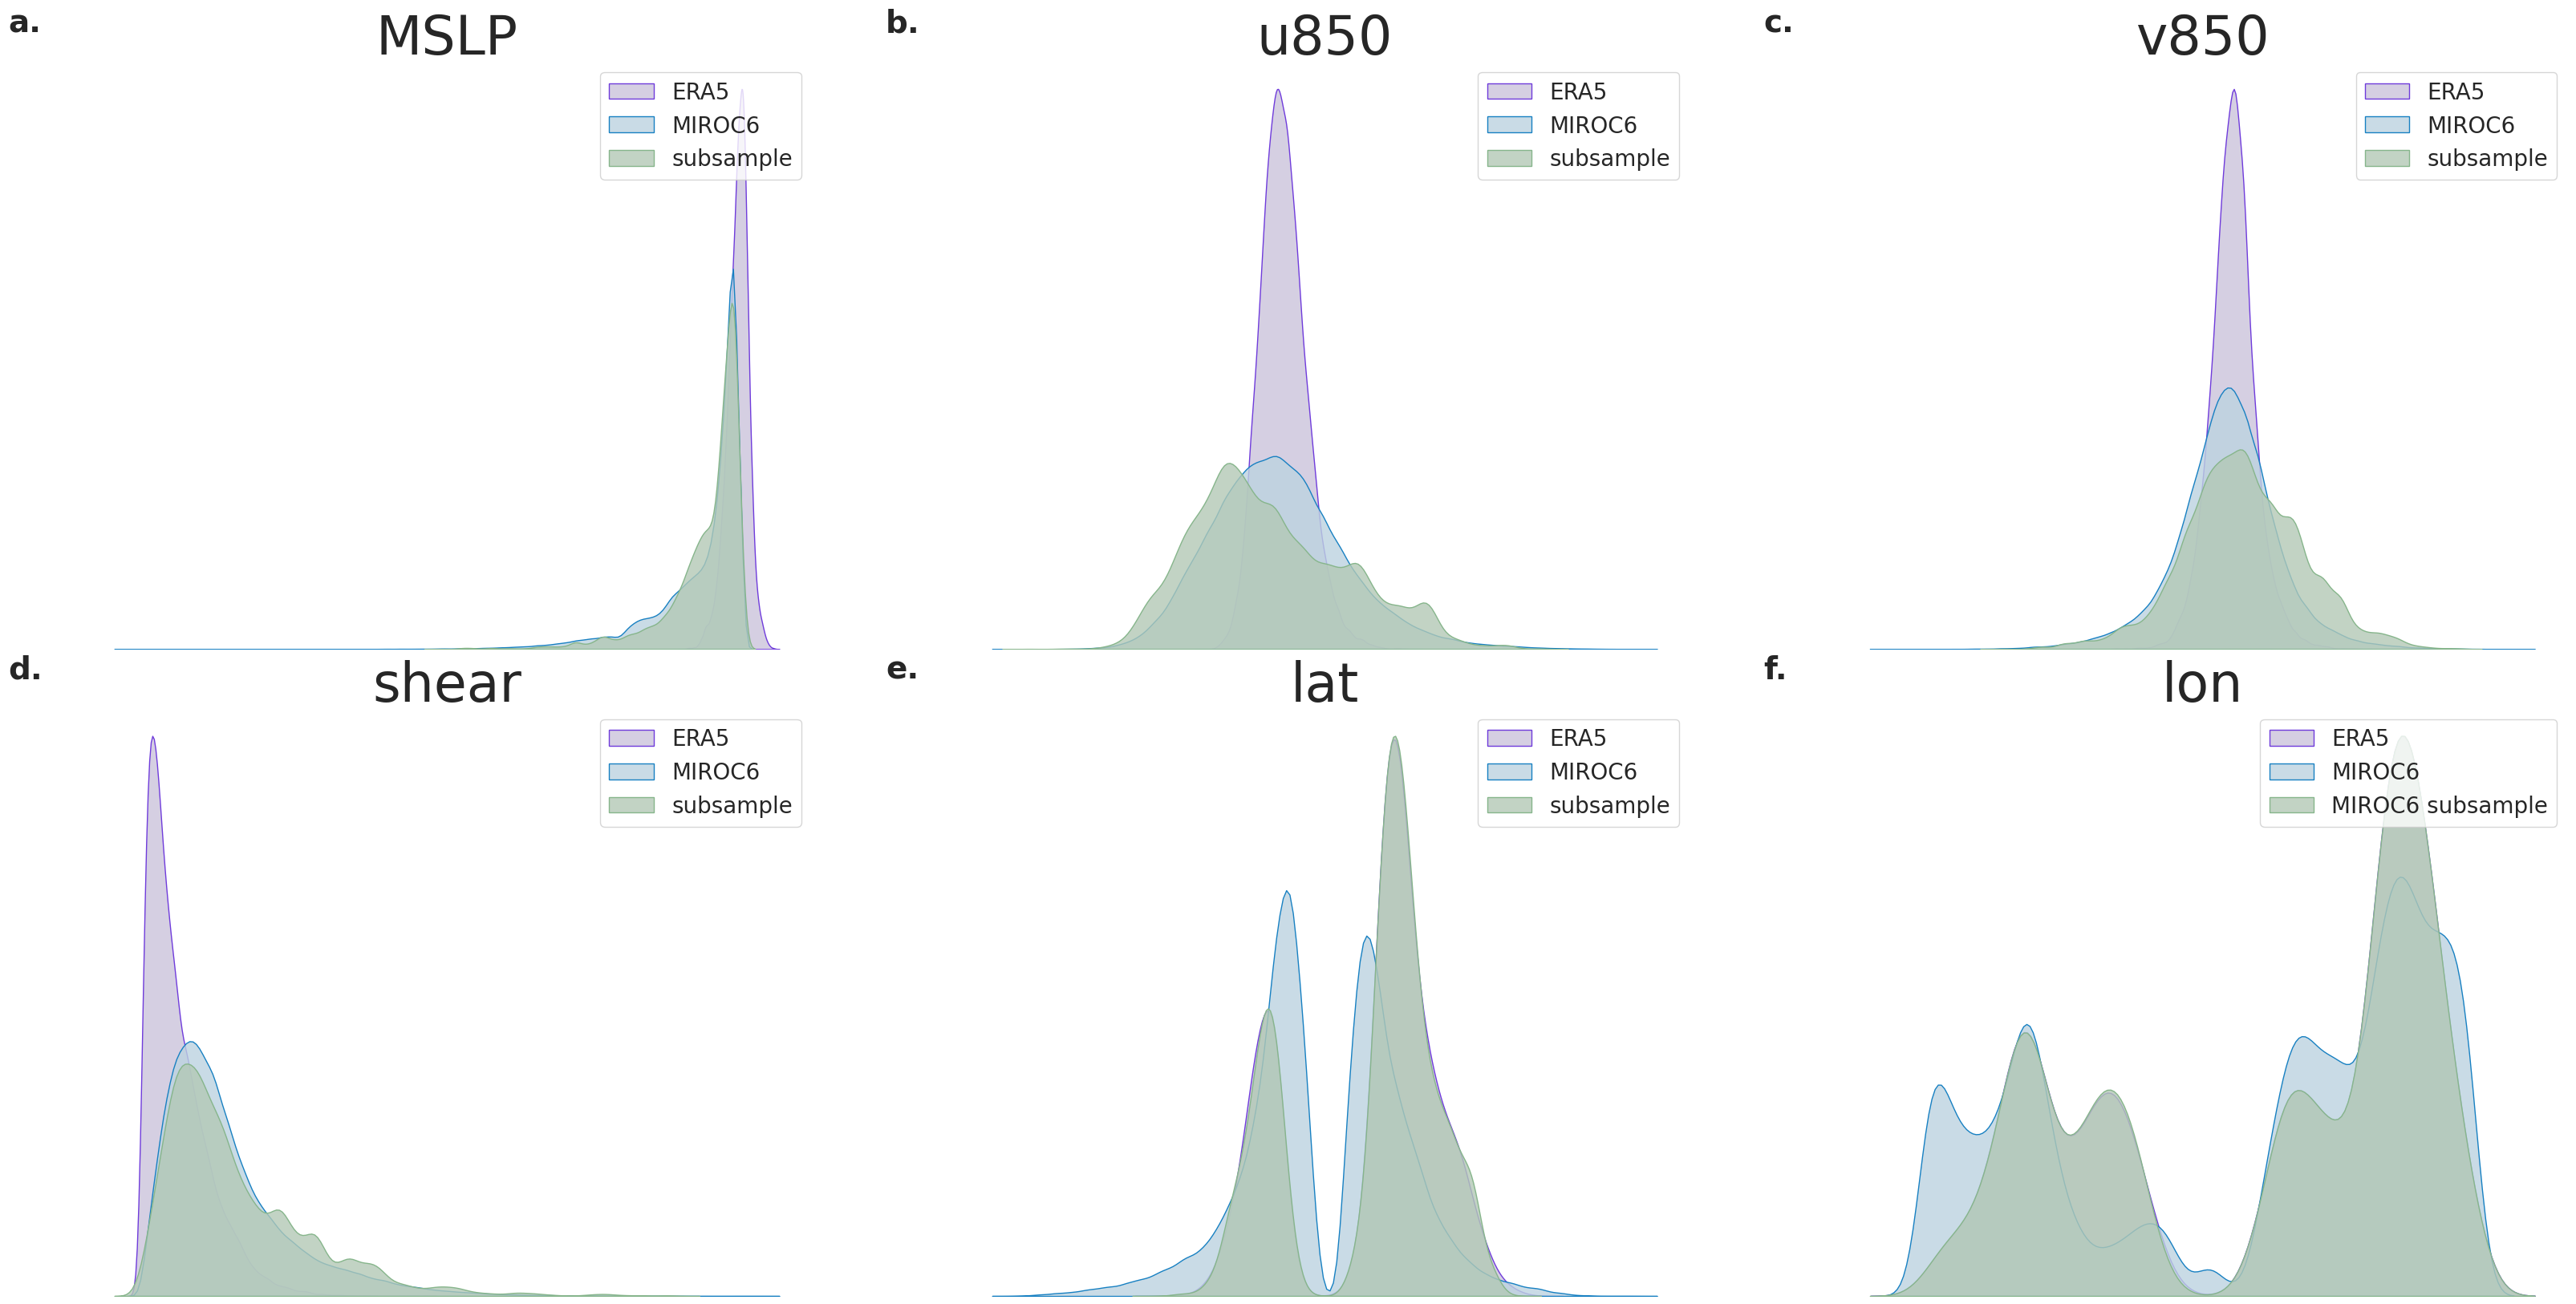

In [9]:
sns.set_context("notebook")
fig, axes = plt.subplots(2,3, figsize=(40, 20))
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
sns.set_style("ticks")

# dorian
# xlim_1 = (-80,-74)
# ylim_1 = (23,29)
# levels = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 350, 400, 500,550]
# vmax=550
sns.set_style("white")


alpha=0.8
# first kde plot

sns.kdeplot(X_train[:,0].flatten(),fill=True,color='#cbc3db',ax=axes[0,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,0].flatten(),fill=True,color='#bcd3e0',ax=axes[0,0],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_mslp[:,0],fill=True,color='#b3c9b6',ax=axes[0,0],alpha=alpha,edgecolor='#86b58b')
# # sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,0],alpha=alpha,edgecolor='#3b991c')
axes[0,0].legend(['ERA5','MIROC6','subsample'],fontsize=20)
axes[0,0].set_title('MSLP',fontsize=48)
axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=28, weight='bold')

# second kde plot
sns.kdeplot(X_train[:,1].flatten(),fill=True,color='#cbc3db',ax=axes[0,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,1].flatten(),fill=True,color='#bcd3e0',ax=axes[0,1],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_u850[:,0],fill=True,color='#b3c9b6',ax=axes[0,1],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,1],alpha=alpha,edgecolor='#3b991c')
axes[0,1].legend(['ERA5','MIROC6','subsample'],fontsize=20)
axes[0,1].set_title('u850',fontsize=48)
axes[0,1].text(-0.1, 1.05, 'b.', transform=axes[0,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,2],fill=True,color='#cbc3db',ax=axes[0,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,2],fill=True,color='#bcd3e0',ax=axes[0,2],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_v850[:,0],fill=True,color='#b3c9b6',ax=axes[0,2],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[0,2].legend(['ERA5','MIROC6','subsample'],fontsize=20)
axes[0,2].set_title('v850',fontsize=48)
axes[0,2].text(-0.1, 1.05, 'c.', transform=axes[0,2].transAxes, size=28, weight='bold')

# fourth kde plot
sns.kdeplot(X_train[:,3],fill=True,color='#cbc3db',ax=axes[1,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,3],fill=True,color='#bcd3e0',ax=axes[1,0],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_shear[:,0],fill=True,color='#b3c9b6',ax=axes[1,0],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,0].legend(['ERA5','MIROC6','subsample'],fontsize=20)
axes[1,0].set_title('shear',fontsize=48)
axes[1,0].text(-0.1, 1.05, 'd.', transform=axes[1,0].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,4],fill=True,color='#cbc3db',ax=axes[1,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,4],fill=True,color='#bcd3e0',ax=axes[1,1],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_lats[:,0],fill=True,color='#b3c9b6',ax=axes[1,1],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,1].legend(['ERA5','MIROC6','subsample'],fontsize=20)
axes[1,1].set_title('lat',fontsize=48)
axes[1,1].text(-0.1, 1.05, 'e.', transform=axes[1,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,5],fill=True,color='#cbc3db',ax=axes[1,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,5],fill=True,color='#bcd3e0',ax=axes[1,2],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(fixed_lons[:,0],fill=True,color='#b3c9b6',alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,2].legend(['ERA5','MIROC6','MIROC6 subsample'],fontsize=20)
axes[1,2].set_title('lon',fontsize=48)
axes[1,2].text(-0.1, 1.05, 'f.', transform=axes[1,2].transAxes, size=28, weight='bold')

plt.subplots_adjust(hspace=0.1)
plt.savefig('miroc_vs_era5_2_corrected_subsample.png',bbox_inches='tight',transparent=False)

In [10]:
# use quantile mapping to bias correct these fields.
from cmethods import CMethods as cm

obs = pd.DataFrame({'var' : X_train[:,0]}) # og distribution
simh = pd.DataFrame({'var' : X_miroc[:,0][:45623]}) # modelled distribution
simp =  pd.DataFrame({'var' : X_miroc[:,0]}) # distribution to bias correct
variable = "var" # temperatures

mslp_qm = cm.quantile_mapping(obs=obs[variable],simh=simh[variable],simp=simp[variable],n_quantiles=250)
u850_qm = cm.quantile_mapping(obs=pd.DataFrame({'var' : X_train[:,1]})['var'],simh=pd.DataFrame({'var' : X_miroc[:,1]})[:45623]['var'],simp=pd.DataFrame({'var' : X_miroc[:,1]})['var'],n_quantiles=250)
v850_qm = cm.quantile_mapping(obs=pd.DataFrame({'var' : X_train[:,2]})['var'],simh=pd.DataFrame({'var' : X_miroc[:,2]})[:45623]['var'],simp=pd.DataFrame({'var' : X_miroc[:,2]})['var'],n_quantiles=250)
shear_qm = cm.quantile_mapping(obs=pd.DataFrame({'var' : X_train[:,3]})['var'],simh=pd.DataFrame({'var' : X_miroc[:,3]})[:45623]['var'],simp=pd.DataFrame({'var' : X_miroc[:,3]})['var'],n_quantiles=250)
lat_qm = cm.quantile_mapping(obs=pd.DataFrame({'var' : X_train[:,4]})['var'],simh=pd.DataFrame({'var' : X_miroc[:,4]})[:45623]['var'],simp=pd.DataFrame({'var' : X_miroc[:,4]})['var'],n_quantiles=250)
lon_qm = cm.quantile_mapping(obs=pd.DataFrame({'var' : X_train[:,5]})['var'],simh=pd.DataFrame({'var' : X_miroc[:,5]})[:45623]['var'],simp=pd.DataFrame({'var' : X_miroc[:,5]})['var'],n_quantiles=250)


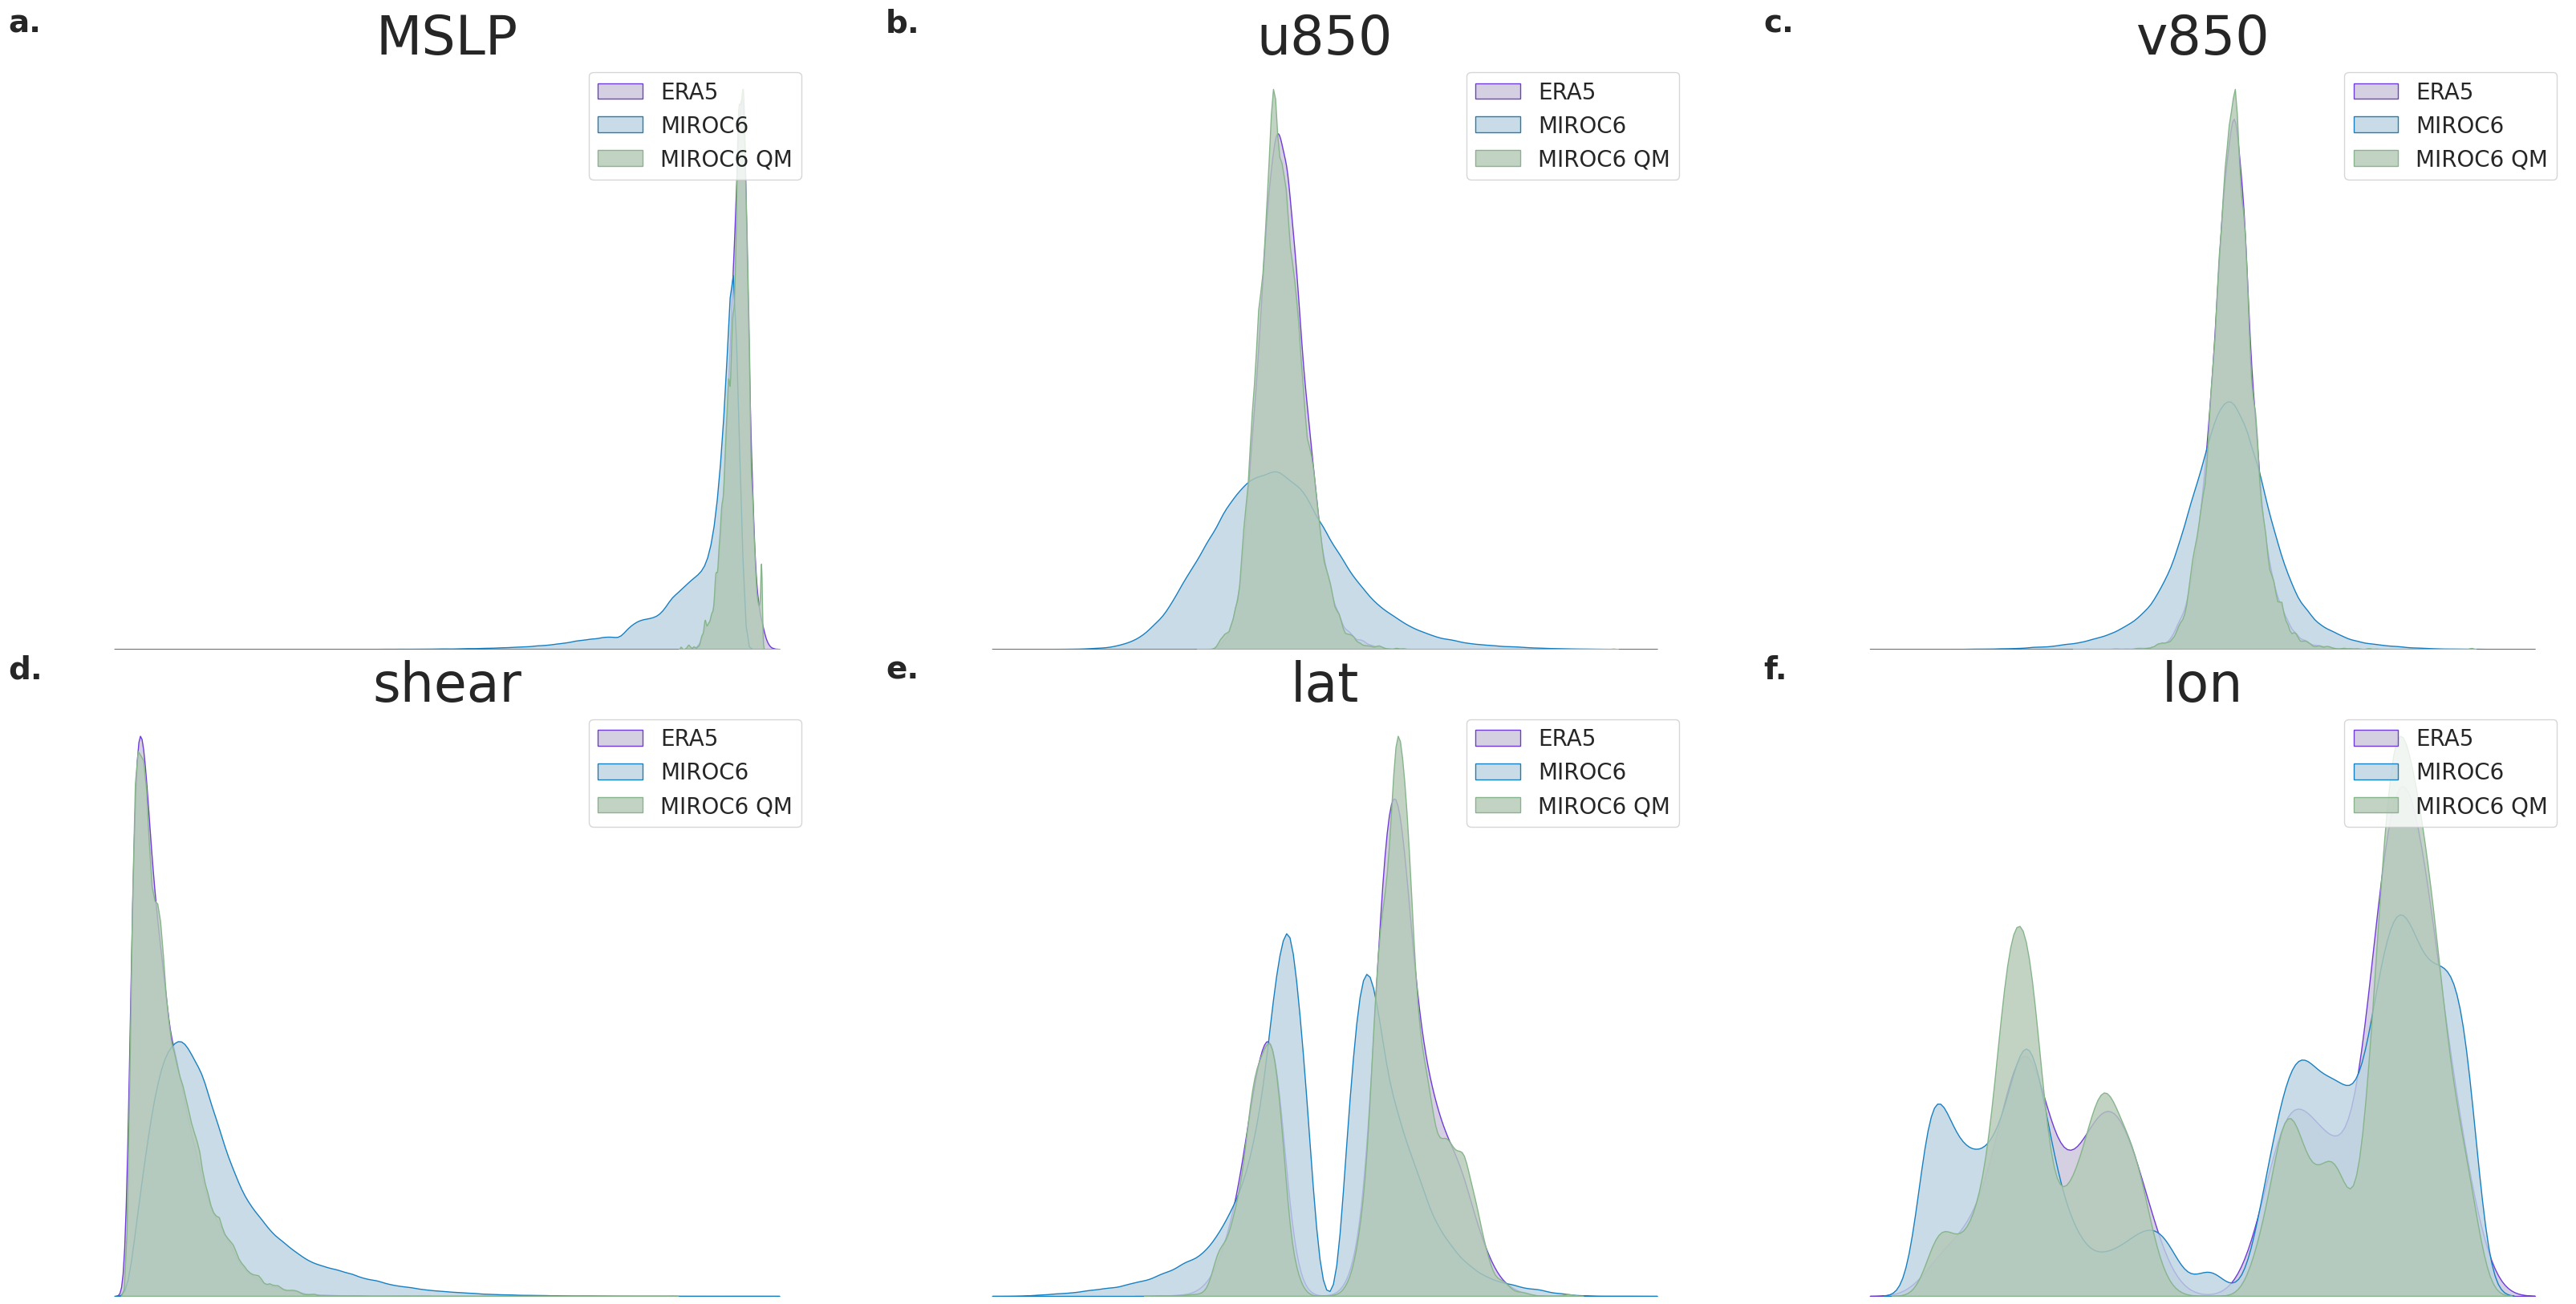

In [11]:
sns.set_context("notebook")
fig, axes = plt.subplots(2,3, figsize=(40, 20))
axes[0, 0].axis('off')
axes[0, 1].axis('off')
axes[0, 2].axis('off')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')
sns.set_style("ticks")

# dorian
# xlim_1 = (-80,-74)
# ylim_1 = (23,29)
# levels = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 350, 400, 500,550]
# vmax=550
sns.set_style("white")


alpha=0.8
# first kde plot

sns.kdeplot(X_train[:,0].flatten(),fill=True,color='#cbc3db',ax=axes[0,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,0].flatten(),fill=True,color='#bcd3e0',ax=axes[0,0],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(mslp_qm,fill=True,color='#b3c9b6',ax=axes[0,0],alpha=alpha,edgecolor='#86b58b')
# # sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,0],alpha=alpha,edgecolor='#3b991c')
axes[0,0].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[0,0].set_title('MSLP',fontsize=48)
axes[0,0].text(-0.1, 1.05, 'a.', transform=axes[0,0].transAxes, size=28, weight='bold')

# second kde plot
sns.kdeplot(X_train[:,1].flatten(),fill=True,color='#cbc3db',ax=axes[0,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,1].flatten(),fill=True,color='#bcd3e0',ax=axes[0,1],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(u850_qm,fill=True,color='#b3c9b6',ax=axes[0,1],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,1],alpha=alpha,edgecolor='#3b991c')
axes[0,1].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[0,1].set_title('u850',fontsize=48)
axes[0,1].text(-0.1, 1.05, 'b.', transform=axes[0,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,2],fill=True,color='#cbc3db',ax=axes[0,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,2],fill=True,color='#bcd3e0',ax=axes[0,2],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(v850_qm,fill=True,color='#b3c9b6',ax=axes[0,2],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[0,2].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[0,2].set_title('v850',fontsize=48)
axes[0,2].text(-0.1, 1.05, 'c.', transform=axes[0,2].transAxes, size=28, weight='bold')

# fourth kde plot
sns.kdeplot(X_train[:,3],fill=True,color='#cbc3db',ax=axes[1,0],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,3],fill=True,color='#bcd3e0',ax=axes[1,0],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(shear_qm,fill=True,color='#b3c9b6',ax=axes[1,0],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,0].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[1,0].set_title('shear',fontsize=48)
axes[1,0].text(-0.1, 1.05, 'd.', transform=axes[1,0].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,4],fill=True,color='#cbc3db',ax=axes[1,1],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,4],fill=True,color='#bcd3e0',ax=axes[1,1],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(lat_qm,fill=True,color='#b3c9b6',ax=axes[1,1],alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,1].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[1,1].set_title('lat',fontsize=48)
axes[1,1].text(-0.1, 1.05, 'e.', transform=axes[1,1].transAxes, size=28, weight='bold')

# third kde plot
sns.kdeplot(X_train[:,5],fill=True,color='#cbc3db',ax=axes[1,2],alpha=alpha,edgecolor='#6f3bdb')
sns.kdeplot(X_miroc[:,5],fill=True,color='#bcd3e0',ax=axes[1,2],alpha=alpha,edgecolor='#1780c2')
sns.kdeplot(lon_qm,fill=True,color='#b3c9b6',alpha=alpha,edgecolor='#86b58b')
# sns.kdeplot(mswep_real_2.flatten(),fill=True,color='#c3deba',ax=axes[0,2],alpha=alpha,edgecolor='#3b991c')
axes[1,2].legend(['ERA5','MIROC6','MIROC6 QM'],fontsize=20)
axes[1,2].set_title('lon',fontsize=48)
axes[1,2].text(-0.1, 1.05, 'f.', transform=axes[1,2].transAxes, size=28, weight='bold')

plt.subplots_adjust(hspace=0.1)
plt.savefig('miroc_vs_era5_2_corrected_qm.png',bbox_inches='tight',transparent=False)

In [12]:
# save corrected miroc data

miroc_hist_corrected = np.zeros((X_miroc.shape))

miroc_hist_corrected[:,0] = mslp_qm 
miroc_hist_corrected[:,1] = u850_qm 
miroc_hist_corrected[:,2] = v850_qm 
miroc_hist_corrected[:,3] = shear_qm
miroc_hist_corrected[:,4] = X_miroc[:,4]
miroc_hist_corrected[:,5] = X_miroc[:,5]

print(miroc_hist_corrected.shape)

np.save('/user/work/al18709/tc_data_flipped/KE_tracks/ke_miroc6-hist_qm_corrected.npy',miroc_hist_corrected)


(724189, 6)


In [4]:
# load model predictions for miroc
# miroc vs miroc corrected vs mswep obs
# load datasets
real,inputs,pred,meta = load_tc_data(set='validation',results='ke_tracks')

miroc_fp = '/user/home/al18709/work/gan_predictions_20/miroc_pred-opt_no_rain_test_run_1.npy'
miroc_corrected_fp = '/user/home/al18709/work/gan_predictions_20/miroc_corrected_pred-opt_no_rain_test_run_1.npy'

miroc = np.load(miroc_fp)
miroc_corrected = np.load(miroc_corrected_fp)

1
2


Text(0.5, 1.0, 'title')

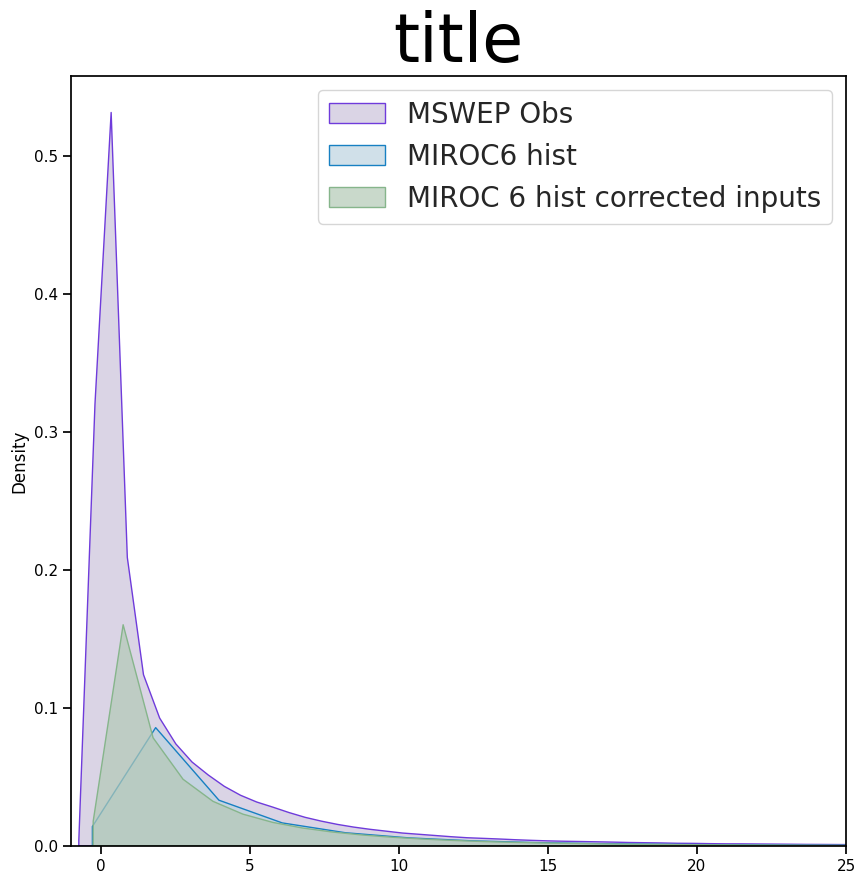

In [5]:
# fourth kde plot
sns.set_context("notebook")
fig, axes = plt.subplots(1,1, figsize=(10, 10))
alpha=0.7
sns.set_style("white")
sns.kdeplot(real[:400,:,:,0].ravel(),fill=True,color='#cbc3db',ax=axes,alpha=alpha,edgecolor='#6f3bdb')
print('1')
sns.kdeplot(miroc[:400].ravel(),fill=True,color='#bcd3e0',ax=axes,alpha=alpha,edgecolor='#1780c2')
print('2')
sns.kdeplot(miroc_corrected[:400].ravel(),fill=True,color='#b3c9b6',ax=axes,alpha=alpha,edgecolor='#86b58b')
plt.xlim([-1, 25])
axes.legend(['MSWEP Obs','MIROC6 hist','MIROC 6 hist corrected inputs'],fontsize=20)
axes.set_title('title',fontsize=48)
# axes[0,0].text(-0.1, 1.05, 'd.', transform=axes[1,0].transAxes, size=28, weight='bold')